## Importing the Necessary Libraries

In [3]:
import tensorflow
from tensorflow.keras.layers import Dense, Flatten, Softmax
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\Admin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Loading the Dataset

In [4]:
fashion_mnist = tensorflow.keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

In [6]:
train_images.shape 

(60000, 28, 28)

9


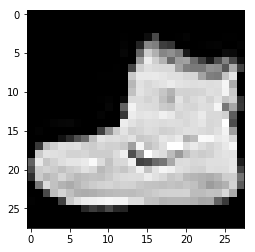

In [7]:
plt.imshow(train_images[0],cmap='gray')
print(train_labels[0])

## Normalizing the Images

In [8]:
train_images = train_images/255.0
test_images = test_images/255.0

## Building the Neural Network 

In [35]:
model = tensorflow.keras.Sequential()
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Softmax())
model.compile(optimizer='adam',loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])

## Defining a Custom Callback Method to stop training 

In [36]:
class Callback(tensorflow.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.96):
            print("\nReached 96% accuracy so cancelling training!")
            self.model.stop_training = True
callback = Callback()

## Fitting the model on the Data

In [37]:
model.fit(train_images,train_labels,epochs = 500, callbacks =[callback])

Train on 60000 samples
Epoch 1/500
60000/60000 [==============================] - 10s 170us/sample - loss: 1.0443 - accuracy: 0.7335
Epoch 2/500
60000/60000 [==============================] - 9s 158us/sample - loss: 0.8584 - accuracy: 0.7760
Epoch 3/500
60000/60000 [==============================] - 10s 165us/sample - loss: 0.8201 - accuracy: 0.7879
Epoch 4/500
60000/60000 [==============================] - 9s 145us/sample - loss: 0.7984 - accuracy: 0.7941
Epoch 5/500
60000/60000 [==============================] - 9s 155us/sample - loss: 0.7809 - accuracy: 0.7994
Epoch 6/500
60000/60000 [==============================] - 9s 145us/sample - loss: 0.7647 - accuracy: 0.8045
Epoch 7/500
60000/60000 [==============================] - 9s 154us/sample - loss: 0.7532 - accuracy: 0.8070
Epoch 8/500
60000/60000 [==============================] - 10s 164us/sample - loss: 0.7419 - accuracy: 0.8122
Epoch 9/500
60000/60000 [==============================] - 10s 167us/sample - loss: 0.7259 - accuracy:

## Testing the model's performance on validation set

In [ ]:
print("Accuracy is : ",model.evaluate(test_images,test_labels)[1]*100,'%')